## 🧮 2. Visualize model metrics

You are now familiar with how CarveMe works, next we will inspect the output GEMs. This notebook loads the models and plots the number of genes, reactions, and metabolites for the different communities. You may follow along passively on GitHub or launch the jupyter notebook from your terminal to interactively run through each code chunk. To do so, launch jupyter from your terminal:
```bash
$ jupyter notebook --browser firefox
```
This should launch a browser window where you can navigate to the `SymbNET/scripts/` foldr and click on the appropriate file to launch this notebook interactively.

Note: this script is forked from Daniel's [carveme_paper repo](https://github.com/cdanielmachado/carveme_paper/blob/master/notebooks/Model%20summary.ipynb).

### Load libraries

In [1]:
%matplotlib inline

In [2]:
from framed import load_cbmodel
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style('white')

### Healthy gut community

<ipython-input-3-4daafaf93186>:38: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax1.legend(legend_text, bbox_to_anchor=(1.1, 1), ncol=3, handles=legend_handles)


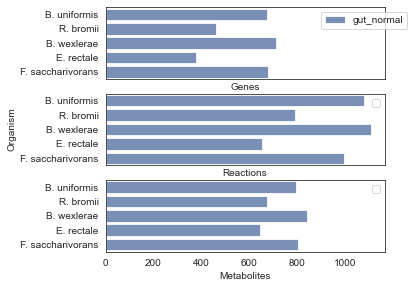

In [3]:
### Gut community members
organisms = ['B. uniformis', 'R. bromii', 'B. wexlerae', 'E. rectale', 'F. saccharivorans']

### Load gut normal models
gut_normal = {
    'B. uniformis': ('../models/gut_normal/ERR260255_bin.24.s.xml', 'cobra'),
    'R. bromii': ('../models/gut_normal/ERR260255_bin.7.p.xml', 'cobra'),
    'B. wexlerae': ('../models/gut_normal/ERR260255_bin.9.s.xml', 'cobra'),
    'E. rectale': ('../models/gut_normal/ERR260255_bin.19.p.xml', 'cobra'),
    'F. saccharivorans': ('../models/gut_normal/ERR260255_bin.14.p.xml', 'cobra')
}

for label, (model_file, flavor) in gut_normal.items():
    gut_normal[label] =  load_cbmodel(model_file, flavor=flavor)

data = []
spontaneous = {'G_spontaneous', 'G_Unknown', 'G_s0001', 'G_NoAssignment'} 

for organism in organisms:
    
    model = gut_normal[organism]
    n_genes = len(set(model.genes) - spontaneous)
    #n_rxns = len([x for x in model.reactions if not x.startswith('R_EX_')])
    n_enzrxns = len([x for x, rxn in model.reactions.items()
                     if rxn.gpr is not None and str(rxn.gpr) not in spontaneous])
    n_mets = len({x[2:-2] for x in model.metabolites})
    data.append((organism, 'gut_normal', n_genes, n_enzrxns, n_mets))
    
df = pd.DataFrame(data, columns=['Organism', 'Source', 'Genes', 'Reactions', 'Metabolites'])

### Plot

f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(5, 4.5))

sns.barplot(x="Genes", y="Organism", hue="Source", data=df, palette='deep', ax=ax1, alpha=0.8)
ax1.set_ylabel('')
legend_handles, legend_text = ax1.get_legend_handles_labels()
ax1.legend(legend_text, bbox_to_anchor=(1.1, 1), ncol=3, handles=legend_handles)

sns.barplot(x="Reactions", y="Organism", hue="Source", data=df, palette='deep', ax=ax2, alpha=0.8)
ax2.get_legend().set_title('')
#ax2.set_xlabel('')
ax2.legend([])

res = sns.barplot(x="Metabolites", y="Organism", hue="Source", data=df, palette='deep', ax=ax3, alpha=0.8)
#ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
ax3.set_ylabel('')
ax3.legend([])

plt.savefig('../plots/model_summary/gut_normal.png', dpi=300, bbox_inches='tight')

### Impaired gut community

<ipython-input-4-431150b4456b>:38: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax1.legend(legend_text, bbox_to_anchor=(1.1, 1), ncol=3, handles=legend_handles)


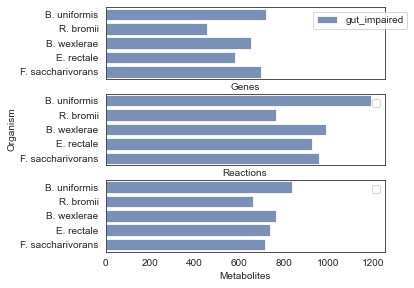

In [4]:
### Gut community members
organisms = ['B. uniformis', 'R. bromii', 'B. wexlerae', 'E. rectale', 'F. saccharivorans']

### Load gut impaired models
gut_impaired = {
    'B. uniformis': ('../models/gut_impaired/ERR260172_bin.10.p.xml', 'cobra'),
    'R. bromii': ('../models/gut_impaired/ERR260172_bin.44.p.xml', 'cobra'),
    'B. wexlerae': ('../models/gut_impaired/ERR260172_bin.7.s.xml', 'cobra'),
    'E. rectale': ('../models/gut_impaired/ERR260172_bin.31.s.xml', 'cobra'),
    'F. saccharivorans': ('../models/gut_impaired/ERR260172_bin.34.p.xml', 'cobra')
}

for label, (model_file, flavor) in gut_impaired.items():
    gut_impaired[label] =  load_cbmodel(model_file, flavor=flavor)
    
data = []
spontaneous = {'G_spontaneous', 'G_Unknown', 'G_s0001', 'G_NoAssignment'} 

for organism in organisms:
    
    model = gut_impaired[organism]
    n_genes = len(set(model.genes) - spontaneous)
    #n_rxns = len([x for x in model.reactions if not x.startswith('R_EX_')])
    n_enzrxns = len([x for x, rxn in model.reactions.items()
                     if rxn.gpr is not None and str(rxn.gpr) not in spontaneous])
    n_mets = len({x[2:-2] for x in model.metabolites})
    data.append((organism, 'gut_impaired', n_genes, n_enzrxns, n_mets))
    
df = pd.DataFrame(data, columns=['Organism', 'Source', 'Genes', 'Reactions', 'Metabolites'])

### Plot

f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(5, 4.5))

sns.barplot(x="Genes", y="Organism", hue="Source", data=df, palette='deep', ax=ax1, alpha=0.8)
ax1.set_ylabel('')
legend_handles, legend_text = ax1.get_legend_handles_labels()
ax1.legend(legend_text, bbox_to_anchor=(1.1, 1), ncol=3, handles=legend_handles)

sns.barplot(x="Reactions", y="Organism", hue="Source", data=df, palette='deep', ax=ax2, alpha=0.8)
ax2.get_legend().set_title('')
#ax2.set_xlabel('')
ax2.legend([])

res = sns.barplot(x="Metabolites", y="Organism", hue="Source", data=df, palette='deep', ax=ax3, alpha=0.8)
#ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
ax3.set_ylabel('')
ax3.legend([])

plt.savefig('../plots/model_summary/gut_impaired.png', dpi=300, bbox_inches='tight')

### T2D gut community

<ipython-input-5-03e9c6147ef2>:38: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax1.legend(legend_text, bbox_to_anchor=(1.1, 1), ncol=3, handles=legend_handles)


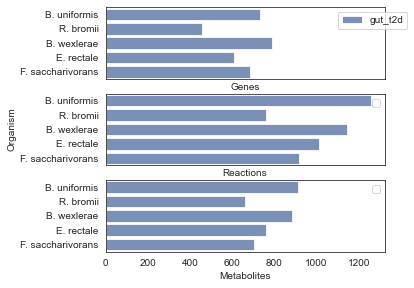

In [5]:
### Gut community members
organisms = ['B. uniformis', 'R. bromii', 'B. wexlerae', 'E. rectale', 'F. saccharivorans']

### Load gut t2d models
gut_t2d = {
    'B. uniformis': ('../models/gut_t2d/ERR260140_bin.3.s.xml', 'cobra'),
    'R. bromii': ('../models/gut_t2d/ERR260140_bin.19.p.xml', 'cobra'),
    'B. wexlerae': ('../models/gut_t2d/ERR260140_bin.13.s.xml', 'cobra'),
    'E. rectale': ('../models/gut_t2d/ERR260140_bin.11.s.xml', 'cobra'),
    'F. saccharivorans': ('../models/gut_t2d/ERR260140_bin.10.p.xml', 'cobra')
}

for label, (model_file, flavor) in gut_t2d.items():
    gut_t2d[label] =  load_cbmodel(model_file, flavor=flavor)
    
data = []
spontaneous = {'G_spontaneous', 'G_Unknown', 'G_s0001', 'G_NoAssignment'} 

for organism in organisms:
    
    model = gut_t2d[organism]
    n_genes = len(set(model.genes) - spontaneous)
    #n_rxns = len([x for x in model.reactions if not x.startswith('R_EX_')])
    n_enzrxns = len([x for x, rxn in model.reactions.items()
                     if rxn.gpr is not None and str(rxn.gpr) not in spontaneous])
    n_mets = len({x[2:-2] for x in model.metabolites})
    data.append((organism, 'gut_t2d', n_genes, n_enzrxns, n_mets))
    
df = pd.DataFrame(data, columns=['Organism', 'Source', 'Genes', 'Reactions', 'Metabolites'])

### Plot

f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(5, 4.5))

sns.barplot(x="Genes", y="Organism", hue="Source", data=df, palette='deep', ax=ax1, alpha=0.8)
ax1.set_ylabel('')
legend_handles, legend_text = ax1.get_legend_handles_labels()
ax1.legend(legend_text, bbox_to_anchor=(1.1, 1), ncol=3, handles=legend_handles)

sns.barplot(x="Reactions", y="Organism", hue="Source", data=df, palette='deep', ax=ax2, alpha=0.8)
ax2.get_legend().set_title('')
#ax2.set_xlabel('')
ax2.legend([])

res = sns.barplot(x="Metabolites", y="Organism", hue="Source", data=df, palette='deep', ax=ax3, alpha=0.8)
#ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
ax3.set_ylabel('')
ax3.legend([])

plt.savefig('../plots/model_summary/gut_t2d.png', dpi=300, bbox_inches='tight')

### RefSeq genome based community

<ipython-input-6-5ff0471d6fb7>:35: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax1.legend(legend_text, bbox_to_anchor=(1.1, 1), ncol=3, handles=legend_handles)


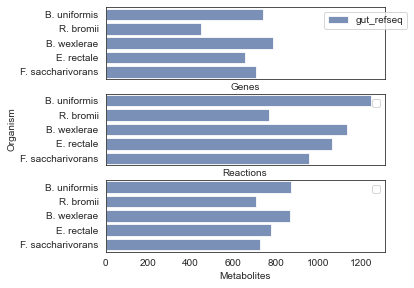

In [6]:
### Load gut refseq models
gut_refseq = {
    'B. uniformis': ('../models/gut_refseq/GCF_018292165.1_ASM1829216v1_protein.xml', 'cobra'),
    'R. bromii': ('../models/gut_refseq/GCF_002834225.1_ASM283422v1_protein.xml', 'cobra'),
    'B. wexlerae': ('../models/gut_refseq/GCF_018785545.1_ASM1878554v1_protein.xml', 'cobra'),
    'E. rectale': ('../models/gut_refseq/GCF_000020605.1_ASM2060v1_protein.xml', 'cobra'),
    'F. saccharivorans': ('../models/gut_refseq/GCF_015557635.1_ASM1555763v1_protein.xml', 'cobra')
}

for label, (model_file, flavor) in gut_refseq.items():
    gut_refseq[label] =  load_cbmodel(model_file, flavor=flavor)

data = []
spontaneous = {'G_spontaneous', 'G_Unknown', 'G_s0001', 'G_NoAssignment'} 

for organism in organisms:
    
    model = gut_refseq[organism]
    n_genes = len(set(model.genes) - spontaneous)
    #n_rxns = len([x for x in model.reactions if not x.startswith('R_EX_')])
    n_enzrxns = len([x for x, rxn in model.reactions.items()
                     if rxn.gpr is not None and str(rxn.gpr) not in spontaneous])
    n_mets = len({x[2:-2] for x in model.metabolites})
    data.append((organism, 'gut_refseq', n_genes, n_enzrxns, n_mets))
    
df = pd.DataFrame(data, columns=['Organism', 'Source', 'Genes', 'Reactions', 'Metabolites'])

### Plot

f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(5, 4.5))

sns.barplot(x="Genes", y="Organism", hue="Source", data=df, palette='deep', ax=ax1, alpha=0.8)
ax1.set_ylabel('')
legend_handles, legend_text = ax1.get_legend_handles_labels()
ax1.legend(legend_text, bbox_to_anchor=(1.1, 1), ncol=3, handles=legend_handles)

sns.barplot(x="Reactions", y="Organism", hue="Source", data=df, palette='deep', ax=ax2, alpha=0.8)
ax2.get_legend().set_title('')
#ax2.set_xlabel('')
ax2.legend([])

res = sns.barplot(x="Metabolites", y="Organism", hue="Source", data=df, palette='deep', ax=ax3, alpha=0.8)
#ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
ax3.set_ylabel('')
ax3.legend([])

plt.savefig('../plots/model_summary/gut_refseq.png', dpi=300, bbox_inches='tight')

### Kefir community

<ipython-input-7-3d5255ea0f66>:38: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax1.legend(legend_text, bbox_to_anchor=(1.1, 1), ncol=3, handles=legend_handles)


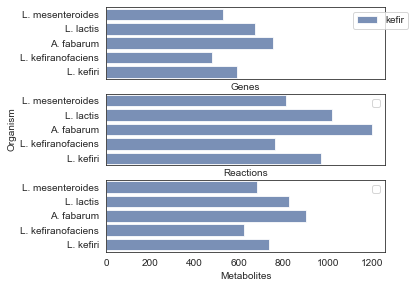

In [7]:
### Kefir community members
organisms = ['L. mesenteroides', 'L. lactis', 'A. fabarum', 'L. kefiranofaciens', 'L. kefiri']

### Load kefir refseq models
kefir = {
    'L. mesenteroides': ('../models/kefir/230a_03182016.xml','cobra'),
    'L. lactis': ('../models/kefir/261_03182016.xml','cobra'),
    'A. fabarum': ('../models/kefir/290_03182016.xml','cobra'),
    'L. kefiranofaciens': ('../models/kefir/322b_03182016.xml','cobra'),
    'L. kefiri': ('../models/kefir/376_03182016.xml','cobra')
}

for label, (model_file, flavor) in kefir.items():
    kefir[label] =  load_cbmodel(model_file, flavor=flavor)

data = []
spontaneous = {'G_spontaneous', 'G_Unknown', 'G_s0001', 'G_NoAssignment'} 

for organism in organisms:
    
    model = kefir[organism]
    n_genes = len(set(model.genes) - spontaneous)
    #n_rxns = len([x for x in model.reactions if not x.startswith('R_EX_')])
    n_enzrxns = len([x for x, rxn in model.reactions.items()
                     if rxn.gpr is not None and str(rxn.gpr) not in spontaneous])
    n_mets = len({x[2:-2] for x in model.metabolites})
    data.append((organism, 'kefir', n_genes, n_enzrxns, n_mets))
    
df = pd.DataFrame(data, columns=['Organism', 'Source', 'Genes', 'Reactions', 'Metabolites'])

### Plot

f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(5, 4.5))

sns.barplot(x="Genes", y="Organism", hue="Source", data=df, palette='deep', ax=ax1, alpha=0.8)
ax1.set_ylabel('')
legend_handles, legend_text = ax1.get_legend_handles_labels()
ax1.legend(legend_text, bbox_to_anchor=(1.1, 1), ncol=3, handles=legend_handles)

sns.barplot(x="Reactions", y="Organism", hue="Source", data=df, palette='deep', ax=ax2, alpha=0.8)
ax2.get_legend().set_title('')
#ax2.set_xlabel('')
ax2.legend([])

res = sns.barplot(x="Metabolites", y="Organism", hue="Source", data=df, palette='deep', ax=ax3, alpha=0.8)
#ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
ax3.set_ylabel('')
ax3.legend([])

plt.savefig('../plots/model_summary/kefir.png', dpi=300, bbox_inches='tight')

### Soil community

<ipython-input-8-0577bdab9749>:38: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax1.legend(legend_text, bbox_to_anchor=(1.1, 1), ncol=3, handles=legend_handles)


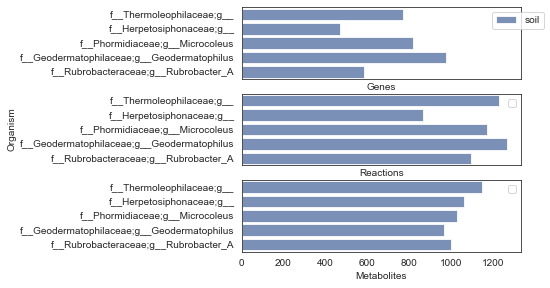

In [8]:
### Soil community members
organisms = ['f__Thermoleophilaceae;g__', 'f__Herpetosiphonaceae;g__', 'f__Phormidiaceae;g__Microcoleus', 'f__Geodermatophilaceae;g__Geodermatophilus', 'f__Rubrobacteraceae;g__Rubrobacter_A']

## soil models
soil = {
    'f__Thermoleophilaceae;g__': ('../ensembles/ERR671933_bin.1.o.xml','cobra'),
    'f__Herpetosiphonaceae;g__': ('../ensembles/ERR671933_bin.2.o.xml','cobra'),
    'f__Phormidiaceae;g__Microcoleus': ('../ensembles/ERR671933_bin.3.s.xml','cobra'),
    'f__Geodermatophilaceae;g__Geodermatophilus': ('../ensembles/ERR671933_bin.4.o.xml','cobra'),
    'f__Rubrobacteraceae;g__Rubrobacter_A': ('../ensembles/ERR671933_bin.5.s.xml','cobra')
}

for label, (model_file, flavor) in soil.items():
    soil[label] =  load_cbmodel(model_file, flavor=flavor)
    
data = []
spontaneous = {'G_spontaneous', 'G_Unknown', 'G_s0001', 'G_NoAssignment'} 

for organism in organisms:
    
    model = soil[organism]
    n_genes = len(set(model.genes) - spontaneous)
    #n_rxns = len([x for x in model.reactions if not x.startswith('R_EX_')])
    n_enzrxns = len([x for x, rxn in model.reactions.items()
                     if rxn.gpr is not None and str(rxn.gpr) not in spontaneous])
    n_mets = len({x[2:-2] for x in model.metabolites})
    data.append((organism, 'soil', n_genes, n_enzrxns, n_mets))
    
df = pd.DataFrame(data, columns=['Organism', 'Source', 'Genes', 'Reactions', 'Metabolites'])

### Plot

f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(5, 4.5))

sns.barplot(x="Genes", y="Organism", hue="Source", data=df, palette='deep', ax=ax1, alpha=0.8)
ax1.set_ylabel('')
legend_handles, legend_text = ax1.get_legend_handles_labels()
ax1.legend(legend_text, bbox_to_anchor=(1.1, 1), ncol=3, handles=legend_handles)

sns.barplot(x="Reactions", y="Organism", hue="Source", data=df, palette='deep', ax=ax2, alpha=0.8)
ax2.get_legend().set_title('')
#ax2.set_xlabel('')
ax2.legend([])

res = sns.barplot(x="Metabolites", y="Organism", hue="Source", data=df, palette='deep', ax=ax3, alpha=0.8)
#ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
ax3.set_ylabel('')
ax3.legend([])

plt.savefig('../plots/model_summary/soil.png', dpi=300, bbox_inches='tight')

### Compare gut models across datasets

<ipython-input-9-c0728b392f06>:49: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax1.legend(legend_text, bbox_to_anchor=(1.1, 1), ncol=3, handles=legend_handles)


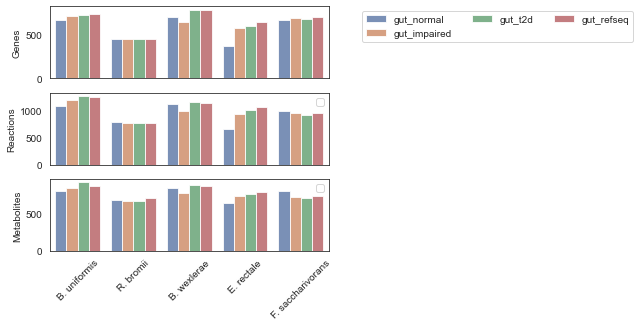

In [9]:
organisms = ['B. uniformis', 'R. bromii', 'B. wexlerae', 'E. rectale', 'F. saccharivorans']

data = []
spontaneous = {'G_spontaneous', 'G_Unknown', 'G_s0001', 'G_NoAssignment'} 

for organism in organisms:
    
    model = gut_normal[organism]
    n_genes = len(set(model.genes) - spontaneous)
    #n_rxns = len([x for x in model.reactions if not x.startswith('R_EX_')])
    n_enzrxns = len([x for x, rxn in model.reactions.items()
                     if rxn.gpr is not None and str(rxn.gpr) not in spontaneous])
    n_mets = len({x[2:-2] for x in model.metabolites})
    data.append((organism, 'gut_normal', n_genes, n_enzrxns, n_mets))
    
    model = gut_impaired[organism]
    n_genes = len(set(model.genes) - spontaneous)
    #n_rxns = len([x for x in model.reactions if not x.startswith('R_EX_')])
    n_enzrxns = len([x for x, rxn in model.reactions.items()
                     if rxn.gpr is not None and str(rxn.gpr) not in spontaneous])
    n_mets = len({x[2:-2] for x in model.metabolites})
    data.append((organism, 'gut_impaired', n_genes, n_enzrxns, n_mets))
    
    model = gut_t2d[organism]
    n_genes = len(set(model.genes) - spontaneous)
    #n_rxns = len([x for x in model.reactions if not x.startswith('R_EX_')])
    n_enzrxns = len([x for x, rxn in model.reactions.items()
                     if rxn.gpr is not None and str(rxn.gpr) not in spontaneous])
    n_mets = len({x[2:-2] for x in model.metabolites})
    data.append((organism, 'gut_t2d', n_genes, n_enzrxns, n_mets))
    
    model = gut_refseq[organism]
    n_genes = len(set(model.genes) - spontaneous)
    #n_rxns = len([x for x in model.reactions if not x.startswith('EX_')])
    n_enzrxns = len([x for x, rxn in model.reactions.items()
                     if rxn.gpr is not None and str(rxn.gpr) not in spontaneous])
    n_mets = len({x[2:-2] for x in model.metabolites})
    data.append((organism, 'gut_refseq', n_genes, n_enzrxns, n_mets))
    
df = pd.DataFrame(data, columns=['Organism', 'Source', 'Genes', 'Reactions', 'Metabolites'])

### Plot

f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(5, 4.5))

sns.barplot(x="Organism", y="Genes", hue="Source", data=df, palette='deep', ax=ax1, alpha=0.8)
ax1.set_xlabel('')
legend_handles, legend_text = ax1.get_legend_handles_labels()
ax1.legend(legend_text, bbox_to_anchor=(1.1, 1), ncol=3, handles=legend_handles)


sns.barplot(x="Organism", y="Reactions", hue="Source", data=df, palette='deep', ax=ax2, alpha=0.8)
ax2.get_legend().set_title('')
ax2.set_xlabel('')
ax2.legend([])

res = sns.barplot(x="Organism", y="Metabolites", hue="Source", data=df, palette='deep', ax=ax3, alpha=0.8)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)
ax3.set_xlabel('')
ax3.legend([])

plt.savefig('../plots/model_summary/gut_all.png', dpi=300, bbox_inches='tight')

### Move on to [exercise 3](https://github.com/franciscozorrilla/SymbNET/blob/main/scripts/3.run_smetana_detailed_interactions.md)